### Table of Contents
* [Introduction](#Intro)
* [Importing the Data](#Data)
* [Investigating the Data](#invest)
    * [Plotting Normalised Closing Prices](#normalised)
    * [Invidual Stock Plots](#individual)
* [Delving into the Statistics](#stats)
    * [Plotting Expected Returns and Standard Deviations](#plotting)
* [Mean - Variance Optimisation](#mean-var)
    * [Plotting our Mean - Variance Optimisation](#mean_plot)
* [Exporting Data](#export)

### Introduction <a class="anchor" id="Intro"></a>

In this notebook we will pull the data on five renewable energy company stocks, clean the data and reformat into a more suitable layout for further analysis.

First up we load in the required libraries and functions. The codecademy functions will be of value later as we delve into mean-variance optimisations of our potential portfolios.

In [90]:
#Imort libraries
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

#Importing our require mean-variance optimisation functions
from codecademy_mean_variance_functions import return_portfolios, optimal_portfolio

### Importing the Data <a class="anchor" id="Data"></a>
Next we want to load in our data on the stocks.

We will be investigating a five year period from the start of 2018 to the start of 2023. The data will be lifted from yahoo finance using the yfinance module.

Our five stocks - as outlined in more detail in the research report - are as follows:
- AFC Energy (AFC.L)
- Ceres (CWR.L)
- Good Energy (GOOD.L)
- Greenwood Renewables (GRP.L)
- ITM Power (ITM.L)

In [91]:
start = datetime(2018,1,1)
end = datetime(2023,1,1)

In [92]:
#Here we pull the data for our 5 stocks, we have pulled the data at one month intervals.
stock_data = yf.download(["ITM.L", "AFC.L", "CWR.L", "GOOD.L", "GRP.L"],start, end, interval='1mo')

[*********************100%%**********************]  5 of 5 completed


## Investigating the Data <a class="anchor" id="invest"></a>
Now our data is loading in, we can begin to investigate the trends and perform further analysis.

First up, we want to look at the the trends of the stocks.

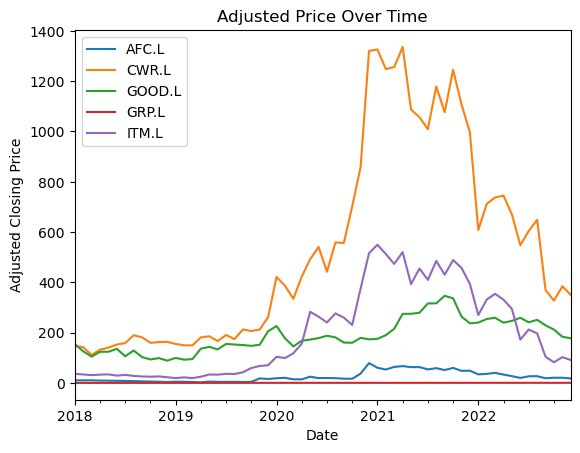

In [93]:
#First we drop down to only the adjusting closing prices, this data will be used in all further analysis
stock_data_closing_prices = stock_data['Adj Close']

#We would like to plot these closing prices, we do this on the same plot as follows:
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

stock_data_closing_prices.plot(color = bar_colors)
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Adjusted Price Over Time")
plt.show()

### Plotting Normalised Closing Prices <a class="anchor" id="normalised"></a>
It is a little tricky to see all the stocks in our first plot, so to see general trends we are going to plot a normalised graph where the stocks are divided by their mean value over our five year period.

In [94]:
#First we make a new DataFrame Called normalied to adjust accordindly
normalised = stock_data_closing_prices

#We reassign the closing prices dataframe to ensure no ambiguity down the line between our two dataframs
stock_data_closing_prices = stock_data['Adj Close']

#For our normalised table, we divide each column (stock) by the mean value
for column in normalised.columns:
    print(column)
    mean = normalised[column].mean()
    normalised[column] = normalised[column].apply(lambda x: x/mean)

AFC.L
CWR.L
GOOD.L
GRP.L
ITM.L


C:\Users\allan\AppData\Local\Temp\ipykernel_13584\1176810290.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalised[column] = normalised[column].apply(lambda x: x/mean)


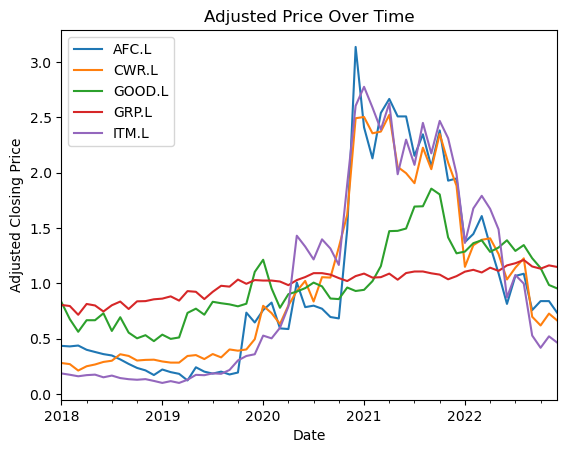

In [95]:
# Now we have our normalised table, we can plot our values
normalised.plot(color = bar_colors)
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Adjusted Price Over Time")
plt.show()

With the above plot, the relationship between AFC, CWR and ITM is clear as day, with their highs and lows almost exactly coinciding.

### Plotting Individual Stocks <a class="anchor" id="individual"></a>
It is a little tricky to see all the stocks in our first plot, so to see general trends we are going to plot a normalised graph where the stocks are divided by their mean value over our five year period.

We also export this plot as a png for use on Power BI and in our report.

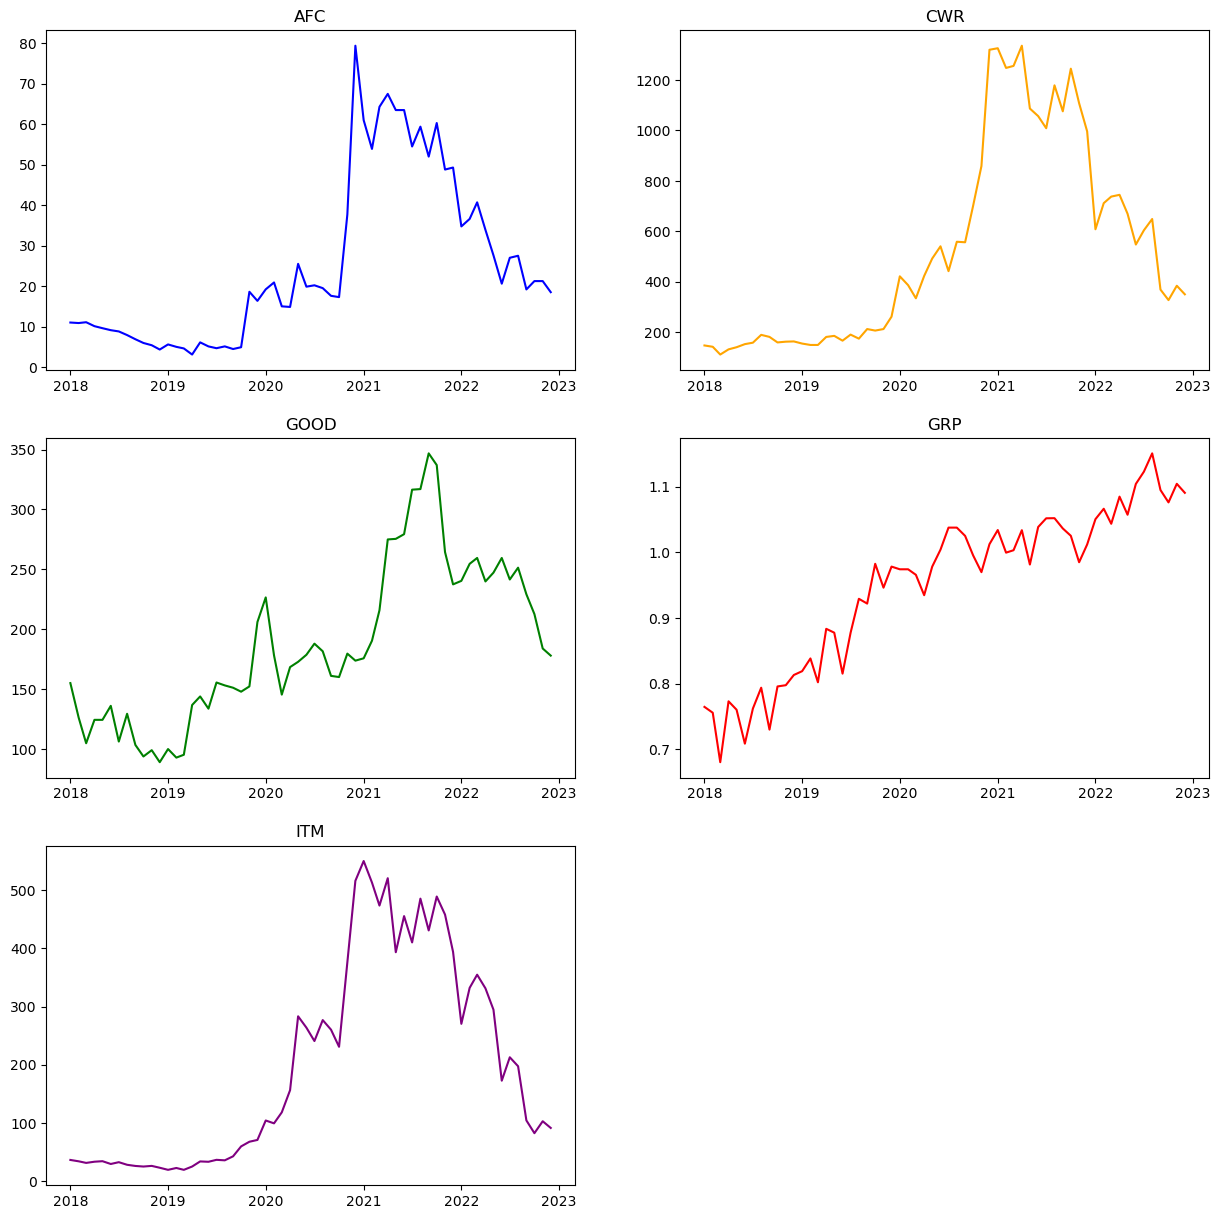

In [96]:
#Next we plot each stock individually, retaining the same colours as above
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(stock_data['Adj Close']['AFC.L'], color = "blue")
ax1.set_title("AFC")
ax2.plot(stock_data['Adj Close']['CWR.L'],  color = "orange")
ax2.set_title("CWR")
ax3.plot(stock_data['Adj Close']['GOOD.L'],  color = "green")
ax3.set_title("GOOD")
ax4.plot(stock_data['Adj Close']['GRP.L'],  color = "red")
ax4.set_title("GRP")
ax5.plot(stock_data['Adj Close']['ITM.L'],  color = "purple")
ax5.set_title("ITM")

#Saving our plot as a png file
plt.savefig("Exported_Data//stocks_over_time.png")
plt.show()

## Delving into the Statistics <a class="anchor" id="stats"></a>
From here we are going to look into some of the statistics on the stocks.

We'd first loke to look at the correlation between the monthly returns on our stocks.

In [97]:
#Dropping down to the adjusted closing prices and using the pandas pct_change function to get us our monthly returns
stock_data_monthly_returns = stock_data['Adj Close'].pct_change()

#creating our correlation table
correlation = stock_data_monthly_returns.corr()

#Outputing the correlations
correlation

,AFC.L,CWR.L,GOOD.L,GRP.L,ITM.L
AFC.L,1.000000,0.269941,0.047670,-0.098133,0.440007
CWR.L,0.269941,1.000000,0.365768,0.207911,0.663892
GOOD.L,0.047670,0.365768,1.000000,0.324131,0.161561
GRP.L,-0.098133,0.207911,0.324131,1.000000,0.223544
ITM.L,0.440007,0.663892,0.161561,0.223544,1.000000


Following this, we would like to see the monthly standard deviations and expected monthly returns of our stocks.

In [98]:
#Working out the monthly standard deviations
monthly_std = stock_data_monthly_returns.std()
monthly_std

AFC.L     0.471352
CWR.L     0.181058
GOOD.L    0.132092
GRP.L     0.045108
ITM.L     0.228986
dtype: float64

In [99]:
#Working out the monthly expected returns
expected_returns = stock_data_monthly_returns.mean()
expected_returns

AFC.L     0.066100
CWR.L     0.030422
GOOD.L    0.010562
GRP.L     0.007032
ITM.L     0.039509
dtype: float64

### Plotting Exp. Returns and Std deviation <a class="anchor" id="plotting"></a>
We'd like to see how the expected returns and standard deviations of our stocks stack up against each other.

First we plot the expected returns.

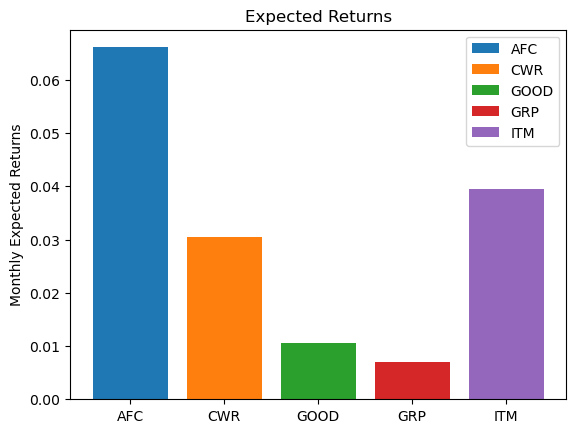

In [100]:
#Plotting the expected returns
ax = plt.subplot()

stocks = ['AFC', 'CWR', 'GOOD', 'GRP', "ITM"]
counts = expected_returns
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

ax.bar(stocks, counts, label=stocks, color=bar_colors)

ax.set_ylabel('Monthly Expected Returns')
ax.set_title('Expected Returns')
ax.legend()

#Saving the figure for later use
plt.savefig("Exported_Data//Expected_returns.png")
plt.show()

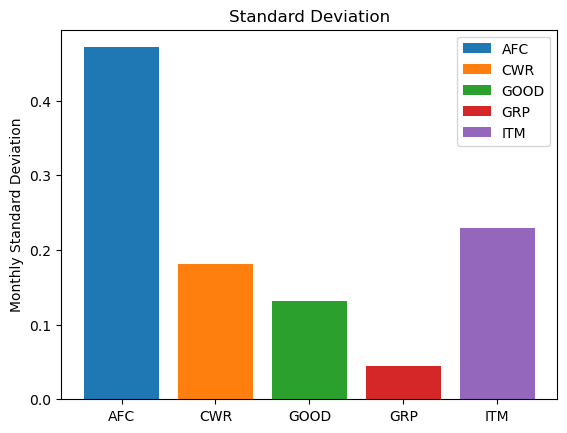

In [101]:
#Plotting the Standard Deviations seen betweent the 5 stocks
ax = plt.subplot()

stocks = ['AFC', 'CWR', 'GOOD', 'GRP', "ITM"]
counts = monthly_std
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

ax.bar(stocks, counts, label=stocks, color=bar_colors)

ax.set_ylabel('Monthly Standard Deviation')
ax.set_title('Standard Deviation')
ax.legend()

#Saving the figure for later use
plt.savefig("Exported_Data//std_dev.png")

plt.show()

## Mean - Variance Optimisation <a class="anchor" id="mean-var"></a>
We are going to perform mean - variance analysis on our five stocks and look into a variety of potential portfolios using a combination of these stocks.

To do this we are going to draw upon code from codeacademy.com, specifically a pair of functions which we loaded in earlier.

The random portfolios function, creates 5000 random porfolios with random weights assigned to each stock.

In [102]:
#To run our functions we need 3 things, the monthly returns, the expected returns by taking means, and a covariance matrix

#These are caluclated here
monthly_returns = stock_data_closing_prices.pct_change()
expected_returns = monthly_returns.mean()
cov_quarterly = monthly_returns.cov()

#
random_portfolios = return_portfolios(expected_returns, cov_quarterly) 

Next to get an Efficient Frontier to show on our plots, we use the optimal portfolio function.

This function returns two arrays of returns and the respective risks (standard devs) for us to plot.

In [103]:
#Calling the optimal_portfolio function
weights, returns, risks = optimal_portfolio(monthly_returns[1:])

     pcost       dcost       gap    pres   dres
 0: -3.1449e-02 -1.0608e+00  1e+00  0e+00  3e+00
 1: -3.2160e-02 -7.0617e-02  4e-02  7e-17  1e-01
 2: -5.1607e-02 -6.2858e-02  1e-02  2e-16  3e-17
 3: -5.4412e-02 -5.5084e-02  7e-04  1e-16  2e-17
 4: -5.4982e-02 -5.4992e-02  1e-05  1e-16  2e-17
 5: -5.4991e-02 -5.4991e-02  1e-07  1e-16  1e-17
 6: -5.4991e-02 -5.4991e-02  1e-09  1e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1261e-02 -1.0602e+00  1e+00  0e+00  3e+00
 1: -3.1951e-02 -6.9961e-02  4e-02  7e-17  1e-01
 2: -5.0138e-02 -6.1224e-02  1e-02  3e-16  3e-17
 3: -5.2983e-02 -5.3740e-02  8e-04  1e-16  1e-17
 4: -5.3619e-02 -5.3637e-02  2e-05  1e-16  6e-18
 5: -5.3636e-02 -5.3636e-02  2e-07  1e-16  1e-17
 6: -5.3636e-02 -5.3636e-02  2e-09  1e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1052e-02 -1.0595e+00  1e+00  2e-16  3e+00
 1: -3.1719e-02 -6.9228e-02  4e-02  8e-17  1e-01
 2: -4.8610e-02 -5.9450e

 5:  1.8744e-01  1.8742e-01  2e-05  1e-16  1e-16
 6:  1.8743e-01  1.8743e-01  2e-06  1e-16  1e-16
 7:  1.8743e-01  1.8743e-01  7e-08  7e-18  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.8160e-01 -8.7203e-01  1e+00  2e-16  4e+00
 1:  2.3744e-01  1.7110e-01  7e-02  2e-16  2e-01
 2:  2.1525e-01  2.0736e-01  8e-03  1e-17  3e-04
 3:  2.1187e-01  2.1069e-01  1e-03  1e-16  2e-16
 4:  2.1138e-01  2.1121e-01  2e-04  1e-16  2e-16
 5:  2.1131e-01  2.1129e-01  2e-05  2e-16  2e-16
 6:  2.1130e-01  2.1130e-01  2e-06  1e-16  2e-16
 7:  2.1130e-01  2.1130e-01  7e-08  3e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.0484e-01 -8.4267e-01  1e+00  2e-16  4e+00
 1:  2.6209e-01  1.9983e-01  6e-02  1e-16  2e-01
 2:  2.4175e-01  2.3437e-01  7e-03  2e-17  7e-04
 3:  2.3862e-01  2.3751e-01  1e-03  1e-16  1e-16
 4:  2.3815e-01  2.3800e-01  2e-04  3e-18  1e-16
 5:  2.3809e-01  2.3807e-01  2e-05  1e-16  2e-16
 6:  2.3808e-01  2.3808

### Plotting Our Mean-Variance Optimisation <a class="anchor" id="mean_plot"></a>
Now we have all our data, we make a scatter plot of our 5000 random portfolios, over this we plot our efficent frontier shown in green.

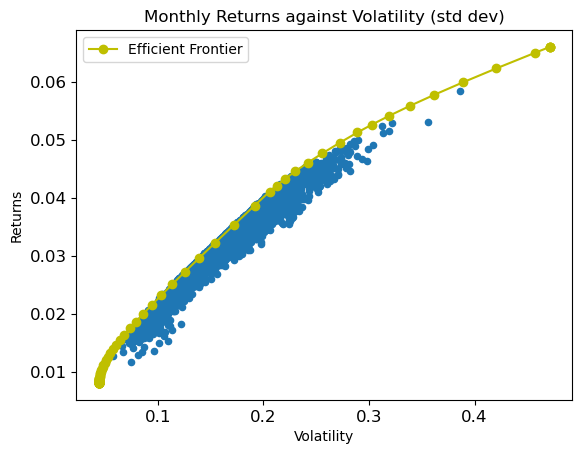

In [104]:
#Scatter plot of random portfolios
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)

#Line plot of the efficient frontier
plt.plot(risks, returns, 'y-o', label="Efficient Frontier")
plt.title("Monthly Returns against Volatility (std dev)")
plt.legend()

#Saving the plot for later use
plt.savefig("Exported_Data//Returns against Volatility.png")
plt.show()


 ### Exporting Data <a class="anchor" id="export"></a>

In [105]:
#Exporting data for later use on power BI
stock_data_closing_prices.to_csv("Exported_Data//stock_data.csv")
monthly_returns.to_csv("Exported_Data//monthly_returns_data.csv")
normalised.to_csv("Exported_Data//normalised_stock_data.csv")
random_portfolios.to_csv("Exported_Data//random_portfolios.csv")